In [75]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import tensorflow as tf
import pandas as pd
import numpy as np


In [2]:
#  Import and read the .csv.

diabetes_df = pd.read_csv("../diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


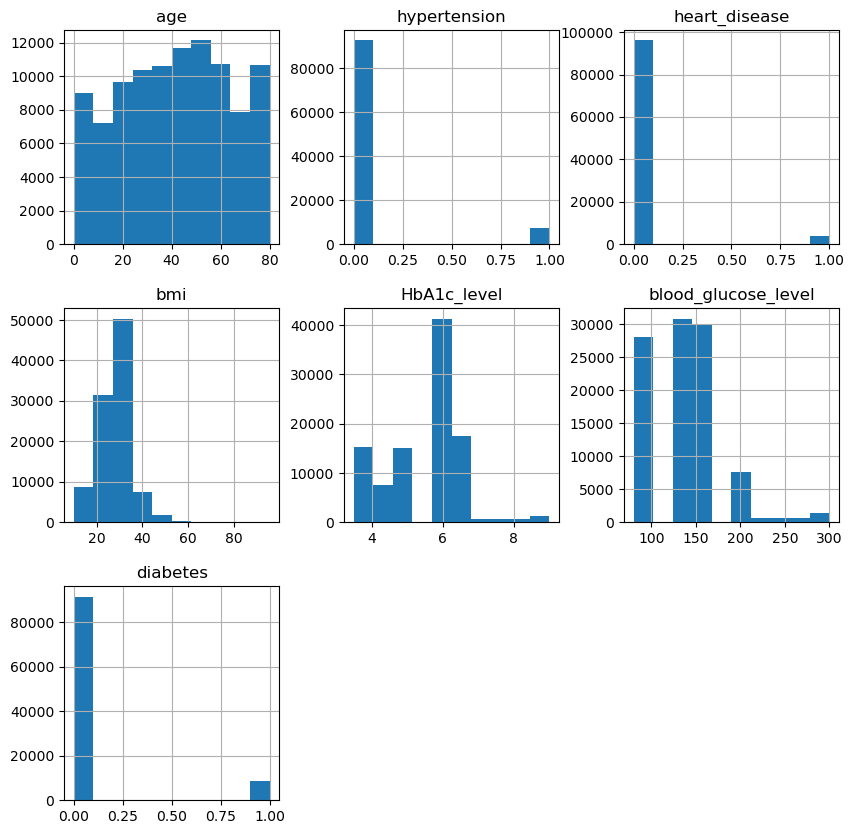

In [3]:
# checking the data distribution
p = diabetes_df.hist(figsize = (10,10))


In [4]:
diabetes_df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [5]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
#DATA PROCESSING
# Check the value counts for smoking_history,  
diabetes_df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [8]:
# change "ever" to never.
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace("ever","never")
diabetes_df["smoking_history"].value_counts()

never          39099
No Info        35816
former          9352
current         9286
not current     6447
Name: smoking_history, dtype: int64

In [9]:
#creating for our smoking_history and gender columns
dummies_df = diabetes_df[["smoking_history", "gender"]]
dummies = pd.get_dummies(dummies_df, dtype=float)
dummies.head()


,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# define our target variabale 
y = diabetes_df['diabetes'].values.reshape(-1,1)

In [11]:
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
X = diabetes_df.drop(columns="diabetes")

In [13]:
X = diabetes_df.merge(dummies, left_index=True, right_index=True)
X.drop(columns=["smoking_history", "gender", "diabetes"], inplace=True)
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,54.0,0,0,27.32,6.6,80,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99998,24.0,0,0,35.42,4.0,100,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
#check the data types again
X.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
smoking_history_No Info        float64
smoking_history_current        float64
smoking_history_former         float64
smoking_history_never          float64
smoking_history_not current    float64
gender_Female                  float64
gender_Male                    float64
gender_Other                   float64
dtype: object

In [15]:
# create our training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [16]:
# Create and scaling our data sets 
StanScale = StandardScaler()

X_scaler = StanScale.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [157]:
def modelCreator():
    n_input_features = len(X_train_scaled[0])
    n_nodes_L1 =  150
    n_nodes_L2 = 150
    # n_nodes_L3 = 

    nn = tf.keras.models.Sequential()

    nn.add(tf.keras.layers.Dense(units=n_nodes_L1, input_dim=n_input_features, activation="relu"))
    nn.add(tf.keras.layers.Dense(units=n_nodes_L2, activation="relu"))
    # nn.add(tf.keras.layers.Dense(units=n_nodes_L3, activation="relu"))


    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


    print("Number of input features: {n_input_features}")
    nn.summary()

    nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["Accuracy" ,tf.keras.metrics.PrecisionAtRecall(0.98)])
    
    fit_model = nn.fit(X_train_scaled, y_train, epochs=50)
    
    # model_loss, model_accuracy= nn.evaluate(X_test_scaled,y_test)
    # print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    model_loss, model_accuracy, model_recall = nn.evaluate(X_test_scaled,y_test)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, recall: {model_recall}")
 
    pred = nn.predict(X_test_scaled).round()
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(
        cm, index=["No Diabetes", "Diabetes"], columns=["No Diabetes", "Diabetes"]
    )
    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, pred)
    cs_Report = classification_report(y_test, pred)
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print(f"Classification Report: ")
    print(cs_Report)
    return nn


In [124]:
def resultShow():
    model_loss, model_accuracy= nn.evaluate(X_test_scaled,y_test)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    pred = nn.predict(X_test_scaled).round()
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(
        cm, index=["No Diabetes", "Diabetes"], columns=["No Diabetes", "Diabetes"]
    )
    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, pred)
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")



In [158]:
modelCreator()

Number of input features: {n_input_features}
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 150)               2250      
                                                                 
 dense_162 (Dense)           (None, 150)               22650     
                                                                 
 dense_163 (Dense)           (None, 1)                 151       
                                                                 
Total params: 25051 (97.86 KB)
Trainable params: 25051 (97.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
2344/2344 [==============================] - 4s 1ms/step - loss: 0.1163 - Accuracy: 0.9594 - precision_at_recall_5: 0.1963
Epoch 2/50
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0940 - Accuracy: 0.9679 

,No Diabetes,Diabetes
No Diabetes,22812,104
Diabetes,630,1454


Accuracy Score : 0.97064
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22916
           1       0.93      0.70      0.80      2084

    accuracy                           0.97     25000
   macro avg       0.95      0.85      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [64]:
resultShow()

782/782 [==============================] - 1s 985us/step - loss: 0.1096 - accuracy: 0.9620
Loss: 0.1096440851688385, Accuracy: 0.9619600176811218
782/782 [==============================] - 1s 804us/step
Confusion Matrix


,No Diabetes,Diabetes
No Diabetes,22729,187
Diabetes,764,1320


Accuracy Score : 0.96196
Classification Report


In [34]:
n_input_features = len(X_train_scaled[0])
n_nodes_L1 =  15
n_nodes_L2 = 15
# n_nodes_L3 = 10

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=n_nodes_L1, input_dim=n_input_features, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=n_nodes_L2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# adding the output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

print("Number of input features: {n_input_features}")
nn.summary()

Number of input features: {n_input_features}
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                225       
                                                                 
 dense_9 (Dense)             (None, 15)                240       
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 483 (1.89 KB)
Trainable params: 483 (1.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=7)

Epoch 1/7
2344/2344 [==============================] - 4s 1ms/step - loss: 0.3770 - accuracy: 0.9537
Epoch 2/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1667 - accuracy: 0.9648
Epoch 3/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1284 - accuracy: 0.9667
Epoch 4/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1192 - accuracy: 0.9667
Epoch 5/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1120 - accuracy: 0.9669
Epoch 6/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1038 - accuracy: 0.9679
Epoch 7/7
2344/2344 [==============================] - 3s 1ms/step - loss: 0.0955 - accuracy: 0.9697


In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy= nn.evaluate(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

782/782 [==============================] - 1s 1ms/step - loss: 0.0884 - accuracy: 0.9716
Loss: 0.08844758570194244, Accuracy: 0.9715999960899353


In [23]:
pred = nn.predict(X_test_scaled).round()

782/782 [==============================] - 1s 926us/step


In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(
    cm, index=["No Diabetes", "Diabetes"], columns=["No Diabetes", "Diabetes"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, pred)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")


Confusion Matrix


,No Diabetes,Diabetes
No Diabetes,22908,8
Diabetes,702,1382


Accuracy Score : 0.9716
Classification Report
